Text(0, 0.5, 'Nh/N')

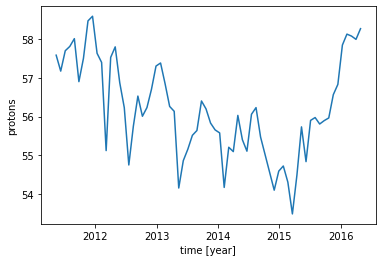

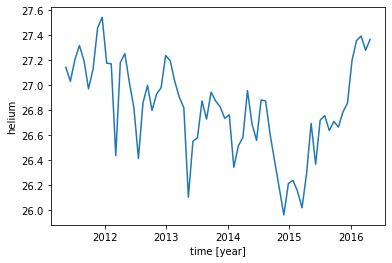

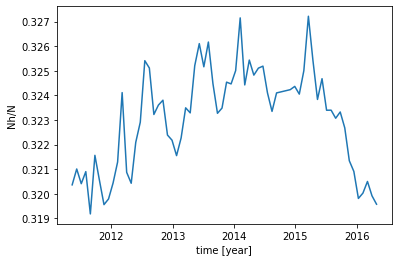

In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def integral(Y1,Y2,E1,E2):
    INT=(Y2*E2-Y1*E1)/((np.log(Y2/Y1)/np.log(E2/E1)+1))
    #print(E1,E2,INT)
    return INT

def load_obj(name ):
    with open('C:\\Users\\ginti\\Desktop\\nirs\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def Y_NM_Mi20_a(energy,h=1000):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    if energy<1.7:
        a,b,c,d=0.5082, -3.0659, 7.2827, -9.5396
    #if energy<1.6:
    #    a,b,c,d=2.0404,	-8.1776,	12.354,	-11.1
    elif (energy>=1.7 and energy<15):
        a,b,c,d=0.1179,	-1.2022,	4.9329,	-8.65
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A = 9.422E-09*np.power(X,5) - 2.284E-07*np.power(X,4) + 2.037E-06*np.power(X,3) - 7.828E-06*np.power(X,2) + 1.203E-05*np.power(X,1) - 5.545E-06					
    B = -5.351E-06*np.power(X,5) + 1.316E-04*np.power(X,4) - 1.226E-03*np.power(X,3) + 5.176E-03*np.power(X,2) - 1.017E-02*np.power(X,1) + 1.458E-02				
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

def Y_NM_Mi20_p(energy,h=1000):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    #if energy<1.25:
    #    a,b,c,d=6.09,	-14.06,	13.98,	-11.615
    if energy<1.28:
        a,b,c,d=0,	-8.6616,	13.879,	-12.104
    elif energy >=1.28 and energy<10:
        a,b,c,d=-0.186,	0.428,	2.831,	-8.76
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A= 6.945E-09*np.power(X,5) - 1.461E-07*np.power(X,4) + 1.115E-06*np.power(X,3) - 3.402E-06*np.power(X,2) + 3.355E-06*np.power(X,1) - 9.823E-07
    B= -3.963E-06*np.power(X,5) + 8.091E-05*np.power(X,4) - 6.394E-04*np.power(X,3) + 2.348E-03*np.power(X,2) - 4.713E-03*np.power(X,1) + 1.186E-02
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
linesiheavy = iheavy.readlines()
column_number = 1
heavy = []
for x in linesiheavy:
    heavy.append(x.split()[column_number])
iheavy.close()

time = load_obj('AMS_time')
t = []

for j in range(0, 78):
    a = float(time.iloc[[j], [0]].values)
    t.append(a)
    
data_protons = load_obj('AMS_spec_p')
pr = []
s = 0

for j in data_protons:
    for i in range(0, 71):
        a = float(data_protons[j].iloc[[i], [4]].values)
        b = Y_NM_Mi20_p(a) * float(data_protons[j].iloc[[i], [6]].values)
        c = float(data_protons[j].iloc[[i+1], [4]].values)
        d = Y_NM_Mi20_p(c) * float(data_protons[j].iloc[[i+1], [6]].values)
        s += integral(b, d, a, c)
    pr.append(s)
    s = 0
    
data_he = load_obj('AMS_spec_he')
he = []
s = 0

for j in data_he:
    for i in range(0, 66):
        a = float(data_he[j].iloc[[i], [4]].values)
        b = Y_NM_Mi20_a(a) * float(data_he[j].iloc[[i], [6]].values) * (1 + float(heavy[i]))
        c = float(data_he[j].iloc[[i+1], [4]].values)
        d = Y_NM_Mi20_a(c) * float(data_he[j].iloc[[i+1], [6]].values)  * (1 + float(heavy[i]))
        s += integral(b, d, a, c)
    he.append(4*s)
    s = 0
    
n = []
for i in range(0, 66):
    nh = he[i] / (pr[i] + he[i])
    n.append(nh)
    
fig,ax1=plt.subplots()
ax1.plot(t[0:66],pr[0:66])
ax1.set_xlabel('time [year]')
ax1.set_ylabel('protons')

fig,ax1=plt.subplots()
ax1.plot(t[0:66],he[0:66])
ax1.set_xlabel('time [year]')
ax1.set_ylabel('helium')

fig,ax1=plt.subplots()
ax1.plot(t[0:66],n)
ax1.set_xlabel('time [year]')
ax1.set_ylabel('Nh/N')